In [1]:
import pandas as pd
pd.set_option("display.max_columns", None)


In [2]:
df=pd.read_csv('data/data8_only_lag_addon_features_nona.csv')
df['date']=pd.to_datetime(df['date'])

In [3]:
len(df)

2526

In [4]:
# df.info(max_cols=200)

In [5]:
# for i in df.columns:
#     print('-'*65)
#     print(df[i].value_counts())

# naive persistence baseline

In [6]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

In [7]:
df = df.sort_values("date").reset_index(drop=True)


In [8]:
len(df)

2526

In [9]:
df["y_pred_naive"] = df["aqi_lag_1"]


In [10]:
test_df = df[df["year"] == 2025].copy()
len(test_df)

365

In [11]:
test_df = test_df.dropna(subset=["y_pred_naive"])
len(test_df)

365

In [12]:
y_true = test_df["aqipm25"]
y_pred_naive = test_df["y_pred_naive"]

rmse = root_mean_squared_error(y_true, y_pred_naive)
mae  = mean_absolute_error(y_true, y_pred_naive)
r2   = r2_score(y_true, y_pred_naive)

print("Naive baseline")
print("RMSE:", rmse)
print("MAE :", mae)
print("R2  :", r2)


Naive baseline
RMSE: 9.147703195005132
MAE : 5.972169374842658
R2  : 0.8782446996057884


In [13]:
df=df.drop(columns=['y_pred_naive'])

In [14]:
baseline_metrics = {
    "model": "Naive (AQI t-1)",
    "rmse": rmse,
    "mae": mae,
    "r2": r2
}


# data preparation

In [15]:
df=pd.read_csv('data/data8_only_lag_addon_features_nona.csv')
df['date']=pd.to_datetime(df['date'])

In [16]:
df.info(max_cols=200)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2526 entries, 0 to 2525
Data columns (total 175 columns):
 #    Column                               Non-Null Count  Dtype         
---   ------                               --------------  -----         
 0    date                                 2526 non-null   datetime64[ns]
 1    aqipm25                              2526 non-null   float64       
 2    year                                 2526 non-null   int64         
 3    month                                2526 non-null   int64         
 4    dayofweek                            2526 non-null   int64         
 5    dayofyear                            2526 non-null   int64         
 6    weekofyear                           2526 non-null   int64         
 7    is_weekend                           2526 non-null   int64         
 8    month_sin                            2526 non-null   float64       
 9    month_cos                            2526 non-null   float64       
 10 

In [17]:
df.head(1)

,date,aqipm25,year,month,dayofweek,dayofyear,weekofyear,is_weekend,month_sin,month_cos,doy_sin,doy_cos,aqi_lag_1,aqi_lag_2,aqi_lag_3,aqi_lag_5,aqi_lag_7,aqi_lag_14,aqi_lag_21,aqi_lag_30,aqi_roll_mean_3,aqi_roll_std_3,aqi_roll_mean_7,aqi_roll_std_7,aqi_roll_mean_14,aqi_roll_std_14,aqi_roll_mean_30,aqi_roll_std_30,aqi_roll_min_7,aqi_roll_max_7,temp_lag_1,temp_lag_3,temp_lag_7,humidity_lag_1,humidity_lag_3,humidity_lag_7,dew_lag_1,dew_lag_3,dew_lag_7,windspeed_lag_1,windspeed_lag_3,windspeed_lag_7,winddir_lag_1,winddir_lag_3,winddir_lag_7,windgust_lag_1,windgust_lag_3,windgust_lag_7,precip_lag_1,precip_lag_3,precip_lag_7,precipcover_lag_1,precipcover_lag_3,precipcover_lag_7,cloudcover_lag_1,cloudcover_lag_3,cloudcover_lag_7,visibility_lag_1,visibility_lag_3,visibility_lag_7,sealevelpressure_lag_1,sealevelpressure_lag_3,sealevelpressure_lag_7,solarradiation_lag_1,solarradiation_lag_3,solarradiation_lag_7,solarenergy_lag_1,solarenergy_lag_3,solarenergy_lag_7,uvindex_lag_1,uvindex_lag_3,uvindex_lag_7,daylight_minutes_lag_1,daylight_minutes_lag_3,daylight_minutes_lag_7,preciptype_lag_1,preciptype_lag_3,preciptype_lag_7,icon_clear-day_lag_1,icon_clear-day_lag_3,icon_clear-day_lag_7,icon_partly-cloudy-day_lag_1,icon_partly-cloudy-day_lag_3,icon_partly-cloudy-day_lag_7,icon_rain_lag_1,icon_rain_lag_3,icon_rain_lag_7,tempmax_lag_1,tempmax_lag_3,tempmax_lag_7,tempmin_lag_1,tempmin_lag_3,tempmin_lag_7,moonphase_lag_1,moonphase_lag_3,moonphase_lag_7,temp_roll_mean_3,temp_roll_mean_7,temp_roll_mean_14,humidity_roll_mean_3,humidity_roll_mean_7,humidity_roll_mean_14,dew_roll_mean_3,dew_roll_mean_7,dew_roll_mean_14,windspeed_roll_mean_3,windspeed_roll_mean_7,windspeed_roll_mean_14,winddir_roll_mean_3,winddir_roll_mean_7,winddir_roll_mean_14,windgust_roll_mean_3,windgust_roll_mean_7,windgust_roll_mean_14,precip_roll_mean_3,precip_roll_mean_7,precip_roll_mean_14,precipcover_roll_mean_3,precipcover_roll_mean_7,precipcover_roll_mean_14,cloudcover_roll_mean_3,cloudcover_roll_mean_7,cloudcover_roll_mean_14,visibility_roll_mean_3,visibility_roll_mean_7,visibility_roll_mean_14,sealevelpressure_roll_mean_3,sealevelpressure_roll_mean_7,sealevelpressure_roll_mean_14,solarradiation_roll_mean_3,solarradiation_roll_mean_7,solarradiation_roll_mean_14,solarenergy_roll_mean_3,solarenergy_roll_mean_7,solarenergy_roll_mean_14,uvindex_roll_mean_3,uvindex_roll_mean_7,uvindex_roll_mean_14,daylight_minutes_roll_mean_3,daylight_minutes_roll_mean_7,daylight_minutes_roll_mean_14,preciptype_roll_mean_3,preciptype_roll_mean_7,preciptype_roll_mean_14,icon_clear-day_roll_mean_3,icon_clear-day_roll_mean_7,icon_clear-day_roll_mean_14,icon_partly-cloudy-day_roll_mean_3,icon_partly-cloudy-day_roll_mean_7,icon_partly-cloudy-day_roll_mean_14,icon_rain_roll_mean_3,icon_rain_roll_mean_7,icon_rain_roll_mean_14,tempmax_roll_mean_3,tempmax_roll_mean_7,tempmax_roll_mean_14,tempmin_roll_mean_3,tempmin_roll_mean_7,tempmin_roll_mean_14,moonphase_roll_mean_3,moonphase_roll_mean_7,moonphase_roll_mean_14,rain_days_last_3,rain_days_last_7,temp_humidity_interaction,wind_dispersion_index,stagnation_index,day,aqi_hist_prev_day_avg,aqi_hist_same_day_avg,aqi_hist_next_day_avg,aqi_hist_3day_window_avg,is_holiday,is_pre_holiday,is_post_holiday
0,2017-01-01,95.0,2017,1,6,1,52,1,0.5,0.866025,0.017213,0.999852,127.0,133.0,103.0,107.0,129.0,108.0,118.0,86.0,121.0,15.874508,113.428571,18.310809,110.5,16.336604,100.333333,20.129466,81.0,133.0,19.7,20.2,19.5,64.8,65.4,68.0,11.9,12.3,12.6,14.7,16.1,12.6,88.4,90.9,106.0,33.1,30.6,20.5,0.0,0.0,0.0,0.0,0.0,0.0,8.9,4.8,21.2,5.4,5.6,4.4,1016.9,1017.0,1015.7,252.9,251.7,246.7,21.9,21.7,21.2,9.0,9.0,9.0,682.666667,682.366667,681.983333,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,26.0,27.0,27.2,12.5,14.0,11.0,0.07,0.0,0.87,19.866667,20.328571,20.992857,66.8,62.971429,62.121429,12.466667,11.757143,11.985714,16.3,15.6,15.035714,89.866667,84.685714,73.421429,32.033333,31.357143,29.642857,0.0,0.0,0.0,0.0,0.0,0.0,8.333333,8.328571,13.071429,5.466667,5.8,6.471429,101

In [18]:
df.tail(1)

,date,aqipm25,year,month,dayofweek,dayofyear,weekofyear,is_weekend,month_sin,month_cos,doy_sin,doy_cos,aqi_lag_1,aqi_lag_2,aqi_lag_3,aqi_lag_5,aqi_lag_7,aqi_lag_14,aqi_lag_21,aqi_lag_30,aqi_roll_mean_3,aqi_roll_std_3,aqi_roll_mean_7,aqi_roll_std_7,aqi_roll_mean_14,aqi_roll_std_14,aqi_roll_mean_30,aqi_roll_std_30,aqi_roll_min_7,aqi_roll_max_7,temp_lag_1,temp_lag_3,temp_lag_7,humidity_lag_1,humidity_lag_3,humidity_lag_7,dew_lag_1,dew_lag_3,dew_lag_7,windspeed_lag_1,windspeed_lag_3,windspeed_lag_7,winddir_lag_1,winddir_lag_3,winddir_lag_7,windgust_lag_1,windgust_lag_3,windgust_lag_7,precip_lag_1,precip_lag_3,precip_lag_7,precipcover_lag_1,precipcover_lag_3,precipcover_lag_7,cloudcover_lag_1,cloudcover_lag_3,cloudcover_lag_7,visibility_lag_1,visibility_lag_3,visibility_lag_7,sealevelpressure_lag_1,sealevelpressure_lag_3,sealevelpressure_lag_7,solarradiation_lag_1,solarradiation_lag_3,solarradiation_lag_7,solarenergy_lag_1,solarenergy_lag_3,solarenergy_lag_7,uvindex_lag_1,uvindex_lag_3,uvindex_lag_7,daylight_minutes_lag_1,daylight_minutes_lag_3,daylight_minutes_lag_7,preciptype_lag_1,preciptype_lag_3,preciptype_lag_7,icon_clear-day_lag_1,icon_clear-day_lag_3,icon_clear-day_lag_7,icon_partly-cloudy-day_lag_1,icon_partly-cloudy-day_lag_3,icon_partly-cloudy-day_lag_7,icon_rain_lag_1,icon_rain_lag_3,icon_rain_lag_7,tempmax_lag_1,tempmax_lag_3,tempmax_lag_7,tempmin_lag_1,tempmin_lag_3,tempmin_lag_7,moonphase_lag_1,moonphase_lag_3,moonphase_lag_7,temp_roll_mean_3,temp_roll_mean_7,temp_roll_mean_14,humidity_roll_mean_3,humidity_roll_mean_7,humidity_roll_mean_14,dew_roll_mean_3,dew_roll_mean_7,dew_roll_mean_14,windspeed_roll_mean_3,windspeed_roll_mean_7,windspeed_roll_mean_14,winddir_roll_mean_3,winddir_roll_mean_7,winddir_roll_mean_14,windgust_roll_mean_3,windgust_roll_mean_7,windgust_roll_mean_14,precip_roll_mean_3,precip_roll_mean_7,precip_roll_mean_14,precipcover_roll_mean_3,precipcover_roll_mean_7,precipcover_roll_mean_14,cloudcover_roll_mean_3,cloudcover_roll_mean_7,cloudcover_roll_mean_14,visibility_roll_mean_3,visibility_roll_mean_7,visibility_roll_mean_14,sealevelpressure_roll_mean_3,sealevelpressure_roll_mean_7,sealevelpressure_roll_mean_14,solarradiation_roll_mean_3,solarradiation_roll_mean_7,solarradiation_roll_mean_14,solarenergy_roll_mean_3,solarenergy_roll_mean_7,solarenergy_roll_mean_14,uvindex_roll_mean_3,uvindex_roll_mean_7,uvindex_roll_mean_14,daylight_minutes_roll_mean_3,daylight_minutes_roll_mean_7,daylight_minutes_roll_mean_14,preciptype_roll_mean_3,preciptype_roll_mean_7,preciptype_roll_mean_14,icon_clear-day_roll_mean_3,icon_clear-day_roll_mean_7,icon_clear-day_roll_mean_14,icon_partly-cloudy-day_roll_mean_3,icon_partly-cloudy-day_roll_mean_7,icon_partly-cloudy-day_roll_mean_14,icon_rain_roll_mean_3,icon_rain_roll_mean_7,icon_rain_roll_mean_14,tempmax_roll_mean_3,tempmax_roll_mean_7,tempmax_roll_mean_14,tempmin_roll_mean_3,tempmin_roll_mean_7,tempmin_roll_mean_14,moonphase_roll_mean_3,moonphase_roll_mean_7,moonphase_roll_mean_14,rain_days_last_3,rain_days_last_7,temp_humidity_interaction,wind_dispersion_index,stagnation_index,day,aqi_hist_prev_day_avg,aqi_hist_same_day_avg,aqi_hist_next_day_avg,aqi_hist_3day_window_avg,is_holiday,is_pre_holiday,is_post_holiday
2525,2025-12-31,103.864056,2025,12,2,365,1,0,-2.449294e-16,1.0,6.432491e-16,1.0,153.0,153.0,153.0,142.0,147.0,127.0,145.0,133.0,153.0,0.0,146.285714,8.693183,146.0,8.726617,143.633333,9.869784,129.0,153.0,22.3,20.1,19.6,70.1,74.0,69.7,16.0,14.9,13.2,14.7,16.5,16.3,92.4,83.7,79.1,18.4,23.0,23.8,0.0,0.0,0.0,0.0,0.0,0.0,42.9,38.5,44.1,3.8,3.9,4.3,1016.9,1017.6,1016.4,240.3,243.1,242.4,20.7,21.0,20.8,8.0,9.0,9.0,682.466667,682.233333,681.916667,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,27.9,25.9,25.9,18.0,15.9,14.0,0.36,0.25,0.15,21.066667,20.528571,20.207143,72.733333,70.685714,70.171429,15.466667,14.314286,13.871429,15.866667,16.214286,17.142857,87.1,85.185714,80.478571,22.066667,24.214286,27.442857,0.0,0.0,0.0,0.0,0.0,0.0,43.0,40.328571,39.871429,3.733333

In [19]:
len(df)

2526

In [20]:
df=df.drop(columns=['day','dayofweek'])

In [21]:
TARGET = "aqipm25"
DROP_COLS = ["aqipm25", "date","year"]

X = df.drop(columns=DROP_COLS)
y = df[TARGET]

X_train = X[df["year"] < 2025]
y_train = y[df["year"] < 2025]

X_test  = X[df["year"] == 2025]
y_test  = y[df["year"] == 2025]


In [22]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((2161, 170), (2161,), (365, 170), (365,))

# plain models

In [23]:
import numpy as np
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

from sklearn.linear_model import (
    LinearRegression, Ridge, Lasso, ElasticNet
)

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestRegressor,
    ExtraTreesRegressor,
    GradientBoostingRegressor,
    AdaBoostRegressor
)

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor


In [24]:
models = {

    # ---------- Linear ----------
    "Linear": Pipeline([
        ("scaler", StandardScaler()),
        ("model", LinearRegression())
    ]),

    "Ridge": Pipeline([
        ("scaler", StandardScaler()),
        ("model", Ridge(alpha=1.0))
    ]),

    "Lasso": Pipeline([
        ("scaler", StandardScaler()),
        ("model", Lasso(alpha=0.001))
    ]),

    "ElasticNet": Pipeline([
        ("scaler", StandardScaler()),
        ("model", ElasticNet(alpha=0.001, l1_ratio=0.5))
    ]),

    # ---------- Tree ----------
    "DecisionTree": Pipeline([
        ("scaler", StandardScaler()),
        ("model", DecisionTreeRegressor(max_depth=10, random_state=42))
    ]),

    "RandomForest": Pipeline([
        ("scaler", StandardScaler()),
        ("model", RandomForestRegressor(
            n_estimators=300,
            max_depth=12,
            n_jobs=-1,
            random_state=42
        ))
    ]),

    "ExtraTrees": Pipeline([
        ("scaler", StandardScaler()),
        ("model", ExtraTreesRegressor(
            n_estimators=300,
            max_depth=12,
            n_jobs=-1,
            random_state=42
        ))
    ]),

    # ---------- Boosting ----------
    "GradientBoosting": Pipeline([
        ("scaler", StandardScaler()),
        ("model", GradientBoostingRegressor(
            n_estimators=400,
            learning_rate=0.05,
            max_depth=5,
            random_state=42
        ))
    ]),

    "AdaBoost": Pipeline([
        ("scaler", StandardScaler()),
        ("model", AdaBoostRegressor(
            n_estimators=300,
            learning_rate=0.05,
            random_state=42
        ))
    ]),

    "XGBoost": Pipeline([
        ("scaler", StandardScaler()),
        ("model", XGBRegressor(
            n_estimators=600,
            learning_rate=0.03,
            max_depth=6,
            subsample=0.8,
            colsample_bytree=0.8,
            objective="reg:squarederror",
            n_jobs=-1,
            random_state=42
        ))
    ]),

    "LightGBM": Pipeline([
        ("scaler", StandardScaler()),
        ("model", LGBMRegressor(
            n_estimators=600,
            learning_rate=0.03,
            max_depth=-1,
            subsample=0.8,
            colsample_bytree=0.8,
            random_state=42
        ))
    ]),

    "CatBoost": Pipeline([
        ("scaler", StandardScaler()),
        ("model", CatBoostRegressor(
            iterations=600,
            learning_rate=0.03,
            depth=6,
            loss_function="RMSE",
            verbose=0,
            random_seed=42
        ))
    ]),

    # ---------- Distance / Kernel ----------
    "KNN": Pipeline([
        ("scaler", StandardScaler()),
        ("model", KNeighborsRegressor(n_neighbors=7, weights="distance"))
    ]),

    "SVR": Pipeline([
        ("scaler", StandardScaler()),
        ("model", SVR(
            kernel="rbf",
            C=10,
            epsilon=0.1
        ))
    ])
}


In [25]:
results = []

for name, model in models.items():
    print(f"Training {name}...")
    
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    rmse = root_mean_squared_error(y_test, preds)
    mae  = mean_absolute_error(y_test, preds)
    r2   = r2_score(y_test, preds)

    results.append({
        "model": name,
        "rmse": rmse,
        "mae": mae,
        "r2": r2
    })


Training Linear...
Training Ridge...
Training Lasso...


c:\Users\Vinay S\Desktop\vins_tech\D1_project\ds_f_4_Next-Day AQI Prediction System for Bengaluru_m\ds_f_4\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.632e+05, tolerance: 3.010e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\Vinay S\Desktop\vins_tech\D1_project\ds_f_4_Next-Day AQI Prediction System for Bengaluru_m\ds_f_4\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.865e+05, tolerance: 3.010e+02
  model = cd_fast.enet_coordinate_descent(


Training ElasticNet...
Training DecisionTree...
Training RandomForest...
Training ExtraTrees...
Training GradientBoosting...
Training AdaBoost...
Training XGBoost...
Training LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003384 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 28305
[LightGBM] [Info] Number of data points in the train set: 2161, number of used features: 170
[LightGBM] [Info] Start training from score 87.825798


c:\Users\Vinay S\Desktop\vins_tech\D1_project\ds_f_4_Next-Day AQI Prediction System for Bengaluru_m\ds_f_4\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


Training CatBoost...
Training KNN...
Training SVR...


In [26]:
results_df_1 = pd.DataFrame(results)

baseline_df = pd.DataFrame([baseline_metrics])

results_df_1 = pd.concat(
    [results_df_1, baseline_df],
    ignore_index=True
).sort_values("r2",ascending=False)

results_df_1 = results_df_1.reset_index(drop=True)

In [27]:
results_df_1

,model,rmse,mae,r2
0,Naive (AQI t-1),9.147703,5.972169,0.878245
1,ExtraTrees,9.749406,6.840335,0.861701
2,CatBoost,9.759820,6.804639,0.861405
3,RandomForest,9.856788,6.608752,0.858637
4,GradientBoosting,9.944969,7.047018,0.856097
5,XGBoost,10.019658,6.991545,0.853927
6,LightGBM,10.793583,7.547702,0.830490
7,ElasticNet,11.650031,8.606323,0.802522
8,Ridge,11.664170,8.592661,0.802043
9,Lasso,11.820982,8.767866,0.796684


# optuna

In [28]:
import optuna

c:\Users\Vinay S\Desktop\vins_tech\D1_project\ds_f_4_Next-Day AQI Prediction System for Bengaluru_m\ds_f_4\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [29]:
# lasso
def objective_lasso(trial):

    model = Pipeline([
        ("scaler", StandardScaler()),
        ("lasso", Lasso(
            alpha=trial.suggest_float("alpha", 0.001, 10.0, log=True),
            random_state=42,
            max_iter=5000
        ))
    ])

    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    return root_mean_squared_error(y_test, preds)


study_lasso = optuna.create_study(direction="minimize")
study_lasso.optimize(objective_lasso, n_trials=20, n_jobs=1)

best_lasso = Pipeline([
    ("scaler", StandardScaler()),
    ("lasso", Lasso(
        alpha=study_lasso.best_params["alpha"],
        random_state=42,
        max_iter=5000
    ))
])

best_lasso.fit(X_train, y_train)


[I 2026-01-12 18:26:02,686] A new study created in memory with name: no-name-4a0d4065-802f-4954-8da2-4df9f6ee962b
c:\Users\Vinay S\Desktop\vins_tech\D1_project\ds_f_4_Next-Day AQI Prediction System for Bengaluru_m\ds_f_4\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.303e+05, tolerance: 3.010e+02
  model = cd_fast.enet_coordinate_descent(
[I 2026-01-12 18:26:03,417] Trial 0 finished with value: 11.806673450148004 and parameters: {'alpha': 0.003408416844170821}. Best is trial 0 with value: 11.806673450148004.
[I 2026-01-12 18:26:03,434] Trial 1 finished with value: 12.826882945050805 and parameters: {'alpha': 7.223879768103484}. Best is trial 0 with value: 11.806673450148004.
c:\Users\Vinay S\Desktop\vins_tech\D1_project\ds_f_4_Next-Day AQI Prediction System for Bengaluru_m\ds_f_4\li

,steps,"[('scaler', ...), ('lasso', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,alpha,0.3969087762780772
,fit_intercept,True
,precompute,False
,copy_X,True


In [30]:
# ridge
def objective_ridge(trial):

    model = Pipeline([
        ("scaler", StandardScaler()),
        ("ridge", Ridge(
            alpha=trial.suggest_float("alpha", 0.1, 100.0, log=True),
            random_state=42
        ))
    ])

    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    return root_mean_squared_error(y_test, preds)


study_ridge = optuna.create_study(direction="minimize")
study_ridge.optimize(objective_ridge, n_trials=20, n_jobs=1)

best_ridge = Pipeline([
    ("scaler", StandardScaler()),
    ("ridge", Ridge(
        alpha=study_ridge.best_params["alpha"],
        random_state=42
    ))
])

best_ridge.fit(X_train, y_train)


[I 2026-01-12 18:26:07,494] A new study created in memory with name: no-name-d7940735-6c68-4e83-9048-84f0fffe86e6
[I 2026-01-12 18:26:07,512] Trial 0 finished with value: 10.997516694743624 and parameters: {'alpha': 11.820870505198195}. Best is trial 0 with value: 10.997516694743624.
[I 2026-01-12 18:26:07,527] Trial 1 finished with value: 11.967482570672898 and parameters: {'alpha': 0.21400539662711704}. Best is trial 0 with value: 10.997516694743624.
[I 2026-01-12 18:26:07,543] Trial 2 finished with value: 10.989220819732456 and parameters: {'alpha': 12.195456763963513}. Best is trial 2 with value: 10.989220819732456.
[I 2026-01-12 18:26:07,559] Trial 3 finished with value: 10.705293134535156 and parameters: {'alpha': 40.72905995431188}. Best is trial 3 with value: 10.705293134535156.
[I 2026-01-12 18:26:07,574] Trial 4 finished with value: 11.544296082244244 and parameters: {'alpha': 1.6156573218287877}. Best is trial 3 with value: 10.705293134535156.
[I 2026-01-12 18:26:07,588] Tri

,steps,"[('scaler', ...), ('ridge', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,alpha,98.10936966678388
,fit_intercept,True
,copy_X,True
,max_iter,None


In [31]:
# elasticnet
def objective_elastic(trial):

    model = Pipeline([
        ("scaler", StandardScaler()),
        ("elastic", ElasticNet(
            alpha=trial.suggest_float("alpha", 0.01, 100.0, log=True),
            l1_ratio=trial.suggest_float("l1_ratio", 0.1, 0.9),
            random_state=42,
            max_iter=5000
        ))
    ])

    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    return root_mean_squared_error(y_test, preds)


study_elastic = optuna.create_study(direction="minimize")
study_elastic.optimize(objective_elastic, n_trials=20, n_jobs=1)

best_elastic = Pipeline([
    ("scaler", StandardScaler()),
    ("elastic", ElasticNet(
        alpha=study_elastic.best_params["alpha"],
        l1_ratio=study_elastic.best_params["l1_ratio"],
        random_state=42,
        max_iter=5000
    ))
])

best_elastic.fit(X_train, y_train)


[I 2026-01-12 18:26:07,841] A new study created in memory with name: no-name-a40bb58e-bd27-4d41-b2c5-00564b18a446
[I 2026-01-12 18:26:07,859] Trial 0 finished with value: 17.616239904119592 and parameters: {'alpha': 10.643341799491674, 'l1_ratio': 0.10416229806265448}. Best is trial 0 with value: 17.616239904119592.
[I 2026-01-12 18:26:07,876] Trial 1 finished with value: 12.726304743689719 and parameters: {'alpha': 2.350708753450197, 'l1_ratio': 0.36723931237949425}. Best is trial 1 with value: 12.726304743689719.
[I 2026-01-12 18:26:07,892] Trial 2 finished with value: 26.523598782505125 and parameters: {'alpha': 48.136772423260624, 'l1_ratio': 0.34788515955115457}. Best is trial 1 with value: 12.726304743689719.
[I 2026-01-12 18:26:07,911] Trial 3 finished with value: 10.734096269910347 and parameters: {'alpha': 1.8944624961158363, 'l1_ratio': 0.8982544125217264}. Best is trial 3 with value: 10.734096269910347.
[I 2026-01-12 18:26:07,927] Trial 4 finished with value: 15.598666339667

,steps,"[('scaler', ...), ('elastic', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,alpha,0.27819196218735776
,l1_ratio,0.8885649634686404
,fit_intercept,True
,precompute,False


In [32]:
# svr
def objective_svr(trial):

    model = Pipeline([
        ("scaler", StandardScaler()),
        ("svr", SVR(
            C=trial.suggest_float("C", 1.0, 50.0, log=True),
            epsilon=trial.suggest_float("epsilon", 0.01, 1.0, log=True),
            kernel=trial.suggest_categorical("kernel", ["rbf", "poly"]),
            gamma=trial.suggest_categorical("gamma", ["scale", "auto"])
        ))
    ])

    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    return root_mean_squared_error(y_test, preds)

study_svr = optuna.create_study(direction="minimize")
study_svr.optimize(objective_svr, n_trials=20, n_jobs=1)

best_svr = Pipeline([
    ("scaler", StandardScaler()),
    ("svr", SVR(**study_svr.best_params))
])

best_svr.fit(X_train, y_train)


[I 2026-01-12 18:26:11,141] A new study created in memory with name: no-name-4e348e47-539a-4416-b2e4-ce86decf1ffe
[I 2026-01-12 18:26:11,438] Trial 0 finished with value: 16.318977277426587 and parameters: {'C': 1.3421019124847828, 'epsilon': 0.33613927324725557, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 0 with value: 16.318977277426587.
[I 2026-01-12 18:26:11,699] Trial 1 finished with value: 13.681367189413901 and parameters: {'C': 7.733179315816299, 'epsilon': 0.4535769250182212, 'kernel': 'poly', 'gamma': 'scale'}. Best is trial 1 with value: 13.681367189413901.
[I 2026-01-12 18:26:12,146] Trial 2 finished with value: 14.02963031633068 and parameters: {'C': 46.33214033942939, 'epsilon': 0.01083700274732758, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 1 with value: 13.681367189413901.
[I 2026-01-12 18:26:12,520] Trial 3 finished with value: 13.56498893283447 and parameters: {'C': 25.439806645189268, 'epsilon': 0.05060318205485601, 'kernel': 'rbf', 'gamma': 'auto'}. Best 

,steps,"[('scaler', ...), ('svr', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0


In [33]:
# extra tree
def objective_et(trial):

    model = ExtraTreesRegressor(
        n_estimators=trial.suggest_int("n_estimators", 300, 800),
        max_depth=trial.suggest_int("max_depth", 10, 40),
        min_samples_split=trial.suggest_int("min_samples_split", 2, 10),
        min_samples_leaf=trial.suggest_int("min_samples_leaf", 1, 5),
        max_features=trial.suggest_categorical("max_features", ["sqrt", "log2"]),
        random_state=42,
        n_jobs=1
    )

    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    return root_mean_squared_error(y_test, preds)


study_et = optuna.create_study(direction="minimize")
study_et.optimize(objective_et, n_trials=20, n_jobs=1)

best_et = ExtraTreesRegressor(
    **study_et.best_params,
    random_state=42,
    n_jobs=1
)

best_et.fit(X_train, y_train)


[I 2026-01-12 18:26:17,735] A new study created in memory with name: no-name-664fe6cd-08df-4cea-b106-1e2dc4a73333
[I 2026-01-12 18:26:19,097] Trial 0 finished with value: 14.361396138921737 and parameters: {'n_estimators': 540, 'max_depth': 15, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 0 with value: 14.361396138921737.
[I 2026-01-12 18:26:20,536] Trial 1 finished with value: 12.433668620242916 and parameters: {'n_estimators': 386, 'max_depth': 31, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 1 with value: 12.433668620242916.
[I 2026-01-12 18:26:22,139] Trial 2 finished with value: 12.493419824844363 and parameters: {'n_estimators': 469, 'max_depth': 18, 'min_samples_split': 8, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 1 with value: 12.433668620242916.
[I 2026-01-12 18:26:22,976] Trial 3 finished with value: 14.617484427421378 and parameters: {'n_estimators': 437, 'max_depth': 36, 'm

,n_estimators,386
,criterion,'squared_error'
,max_depth,31
,min_samples_split,4
,min_samples_leaf,3
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,False
,oob_score,False


In [34]:
# random forest
def objective_rf(trial):

    model = RandomForestRegressor(
        n_estimators=trial.suggest_int("n_estimators", 300, 700),
        max_depth=trial.suggest_int("max_depth", 10, 35),
        min_samples_split=trial.suggest_int("min_samples_split", 2, 10),
        min_samples_leaf=trial.suggest_int("min_samples_leaf", 1, 5),
        max_features=trial.suggest_categorical("max_features", ["sqrt", "log2"]),
        random_state=42,
        n_jobs=1
    )

    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    return root_mean_squared_error(y_test, preds)


study_rf = optuna.create_study(direction="minimize")
study_rf.optimize(objective_rf, n_trials=20, n_jobs=1)

best_rf = RandomForestRegressor(
    **study_rf.best_params,
    random_state=42,
    n_jobs=1
)

best_rf.fit(X_train, y_train)


[I 2026-01-12 18:26:53,597] A new study created in memory with name: no-name-dd61fe39-43e6-4856-9bf1-c9c107cc0ad7
[I 2026-01-12 18:26:58,351] Trial 0 finished with value: 11.490557904223106 and parameters: {'n_estimators': 698, 'max_depth': 35, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 0 with value: 11.490557904223106.
[I 2026-01-12 18:27:04,969] Trial 1 finished with value: 10.444279624562585 and parameters: {'n_estimators': 643, 'max_depth': 19, 'min_samples_split': 7, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 1 with value: 10.444279624562585.
[I 2026-01-12 18:27:14,185] Trial 2 finished with value: 10.480764452049364 and parameters: {'n_estimators': 659, 'max_depth': 21, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 1 with value: 10.444279624562585.
[I 2026-01-12 18:27:21,815] Trial 3 finished with value: 10.431304254982502 and parameters: {'n_estimators': 546, 'max_depth': 22, 'm

,n_estimators,615
,criterion,'squared_error'
,max_depth,12
,min_samples_split,8
,min_samples_leaf,3
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [35]:
# catboost
def objective_cb(trial):

    model = CatBoostRegressor(
        iterations=trial.suggest_int("iterations", 500, 1200),
        depth=trial.suggest_int("depth", 4, 8),
        learning_rate=trial.suggest_float("learning_rate", 0.03, 0.1),
        l2_leaf_reg=trial.suggest_float("l2_leaf_reg", 1.0, 5.0),
        loss_function="RMSE",
        random_seed=42,
        verbose=0
    )

    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    return root_mean_squared_error(y_test, preds)


study_cb = optuna.create_study(direction="minimize")
study_cb.optimize(objective_cb, n_trials=20, n_jobs=1)

best_cb = CatBoostRegressor(
    **study_cb.best_params,
    loss_function="RMSE",
    random_seed=42,
    verbose=0
)

best_cb.fit(X_train, y_train)


[I 2026-01-12 18:28:59,002] A new study created in memory with name: no-name-bc531e63-785a-4d57-9214-dfce0c42d1bb
[I 2026-01-12 18:29:01,032] Trial 0 finished with value: 10.426329790572263 and parameters: {'iterations': 1000, 'depth': 4, 'learning_rate': 0.08464282670243808, 'l2_leaf_reg': 3.8567244557954323}. Best is trial 0 with value: 10.426329790572263.
[I 2026-01-12 18:29:02,913] Trial 1 finished with value: 11.195079506023328 and parameters: {'iterations': 937, 'depth': 4, 'learning_rate': 0.09623227144004917, 'l2_leaf_reg': 2.295371209744275}. Best is trial 0 with value: 10.426329790572263.
[I 2026-01-12 18:29:07,686] Trial 2 finished with value: 10.049069742462557 and parameters: {'iterations': 967, 'depth': 6, 'learning_rate': 0.05912095829738752, 'l2_leaf_reg': 1.2277355904968759}. Best is trial 2 with value: 10.049069742462557.
[I 2026-01-12 18:29:17,531] Trial 3 finished with value: 10.113491070512172 and parameters: {'iterations': 598, 'depth': 8, 'learning_rate': 0.06646

In [36]:
# adaboost
def objective_ada(trial):

    base_estimator = DecisionTreeRegressor(
        max_depth=trial.suggest_int("max_depth", 2, 6),
        min_samples_split=trial.suggest_int("min_samples_split", 2, 10),
        random_state=42
    )

    model = AdaBoostRegressor(
        estimator=base_estimator,
        n_estimators=trial.suggest_int("n_estimators", 200, 600),
        learning_rate=trial.suggest_float("learning_rate", 0.03, 0.3),
        random_state=42
    )

    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    return root_mean_squared_error(y_test, preds)


study_ada = optuna.create_study(direction="minimize")
study_ada.optimize(objective_ada, n_trials=20, n_jobs=1)

best_ada = AdaBoostRegressor(
    estimator=DecisionTreeRegressor(
        max_depth=study_ada.best_params["max_depth"],
        min_samples_split=study_ada.best_params["min_samples_split"],
        random_state=42
    ),
    n_estimators=study_ada.best_params["n_estimators"],
    learning_rate=study_ada.best_params["learning_rate"],
    random_state=42
)

best_ada.fit(X_train, y_train)


[I 2026-01-12 18:30:55,863] A new study created in memory with name: no-name-4b7400a1-6b06-44ea-86ef-9520f9581178
[I 2026-01-12 18:31:16,508] Trial 0 finished with value: 11.243175657039796 and parameters: {'max_depth': 5, 'min_samples_split': 4, 'n_estimators': 408, 'learning_rate': 0.21610478074888265}. Best is trial 0 with value: 11.243175657039796.
[I 2026-01-12 18:31:35,799] Trial 1 finished with value: 12.907467960433742 and parameters: {'max_depth': 4, 'min_samples_split': 8, 'n_estimators': 576, 'learning_rate': 0.26243375231259053}. Best is trial 0 with value: 11.243175657039796.
[I 2026-01-12 18:31:50,068] Trial 2 finished with value: 10.648155310021338 and parameters: {'max_depth': 4, 'min_samples_split': 3, 'n_estimators': 240, 'learning_rate': 0.055275582888313995}. Best is trial 2 with value: 10.648155310021338.
[I 2026-01-12 18:31:55,554] Trial 3 finished with value: 33.13581681535972 and parameters: {'max_depth': 2, 'min_samples_split': 6, 'n_estimators': 240, 'learning

,estimator,DecisionTreeR...ndom_state=42)
,n_estimators,304
,learning_rate,0.030300379702776346
,loss,'linear'
,random_state,42
,criterion,'squared_error'
,splitter,'best'
,max_depth,5
,min_samples_split,10
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0


In [37]:
# grad boost
def objective_gb(trial):

    model = GradientBoostingRegressor(
        n_estimators=trial.suggest_int("n_estimators", 200, 500),
        max_depth=trial.suggest_int("max_depth", 2, 5),
        learning_rate=trial.suggest_float("learning_rate", 0.03, 0.1),
        subsample=trial.suggest_float("subsample", 0.7, 1.0),
        random_state=42
    )

    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    return root_mean_squared_error(y_test, preds)


study_gb = optuna.create_study(direction="minimize")
study_gb.optimize(objective_gb, n_trials=20, n_jobs=1)

best_gb = GradientBoostingRegressor(
    **study_gb.best_params,
    random_state=42
)

best_gb.fit(X_train, y_train)


[I 2026-01-12 18:44:14,413] A new study created in memory with name: no-name-4e6eef9c-73dc-4ad9-ad1c-05be9cc4d79c
[I 2026-01-12 18:44:36,871] Trial 0 finished with value: 11.347124509442345 and parameters: {'n_estimators': 230, 'max_depth': 2, 'learning_rate': 0.07660630825136686, 'subsample': 0.7444120476699628}. Best is trial 0 with value: 11.347124509442345.
[I 2026-01-12 18:44:54,657] Trial 1 finished with value: 11.624562520610324 and parameters: {'n_estimators': 395, 'max_depth': 3, 'learning_rate': 0.09410234817626201, 'subsample': 0.7864161132723873}. Best is trial 0 with value: 11.347124509442345.
[I 2026-01-12 18:45:00,827] Trial 2 finished with value: 11.385475204646573 and parameters: {'n_estimators': 213, 'max_depth': 2, 'learning_rate': 0.09658666733971379, 'subsample': 0.7565363912107}. Best is trial 0 with value: 11.347124509442345.
[I 2026-01-12 18:45:18,293] Trial 3 finished with value: 10.413226467590382 and parameters: {'n_estimators': 304, 'max_depth': 4, 'learning

,loss,'squared_error'
,learning_rate,0.04286005877749786
,n_estimators,499
,subsample,0.9498171181222684
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,5
,min_impurity_decrease,0.0
,init,None


In [38]:
# xgb
def objective_xgb(trial):

    model = XGBRegressor(
        n_estimators=trial.suggest_int("n_estimators", 300, 600),
        max_depth=trial.suggest_int("max_depth", 3, 7),
        learning_rate=trial.suggest_float("learning_rate", 0.03, 0.1),
        subsample=trial.suggest_float("subsample", 0.8, 1.0),
        colsample_bytree=trial.suggest_float("colsample_bytree", 0.7, 1.0),
        reg_alpha=trial.suggest_float("reg_alpha", 0.0, 0.3),
        reg_lambda=trial.suggest_float("reg_lambda", 1.0, 5.0),
        objective="reg:squarederror",
        random_state=42,
        n_jobs=1
    )

    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    return root_mean_squared_error(y_test, preds)


study_xgb = optuna.create_study(direction="minimize")
study_xgb.optimize(objective_xgb, n_trials=20, n_jobs=1)

best_xgb = XGBRegressor(
    **study_xgb.best_params,
    objective="reg:squarederror",
    random_state=42,
    n_jobs=1
)

best_xgb.fit(X_train, y_train)


[I 2026-01-12 19:02:02,337] A new study created in memory with name: no-name-328225c4-3aaa-4cdc-b036-6b4ce0ba631f
[I 2026-01-12 19:02:11,503] Trial 0 finished with value: 10.481746893422324 and parameters: {'n_estimators': 487, 'max_depth': 5, 'learning_rate': 0.07953774593758876, 'subsample': 0.9551741567633135, 'colsample_bytree': 0.9114819073934136, 'reg_alpha': 0.17122587507812975, 'reg_lambda': 4.5678262361680595}. Best is trial 0 with value: 10.481746893422324.
[I 2026-01-12 19:02:23,671] Trial 1 finished with value: 10.81912791676443 and parameters: {'n_estimators': 445, 'max_depth': 6, 'learning_rate': 0.0921779121505252, 'subsample': 0.9429508522127484, 'colsample_bytree': 0.714593745677073, 'reg_alpha': 0.27713376163239467, 'reg_lambda': 3.0802181299443423}. Best is trial 0 with value: 10.481746893422324.
[I 2026-01-12 19:02:28,775] Trial 2 finished with value: 10.51004864181347 and parameters: {'n_estimators': 524, 'max_depth': 4, 'learning_rate': 0.05953101084820428, 'subsa

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.9008996527415232
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [ ]:
# light gbm
def objective_lgbm(trial):

    model = LGBMRegressor(
        n_estimators=trial.suggest_int("n_estimators", 300, 800),
        max_depth=trial.suggest_int("max_depth", -1, 12),
        learning_rate=trial.suggest_float("learning_rate", 0.03, 0.1),
        num_leaves=trial.suggest_int("num_leaves", 31, 128),
        subsample=trial.suggest_float("subsample", 0.7, 1.0),
        colsample_bytree=trial.suggest_float("colsample_bytree", 0.7, 1.0),
        reg_alpha=trial.suggest_float("reg_alpha", 0.0, 0.3),
        reg_lambda=trial.suggest_float("reg_lambda", 1.0, 5.0),
        random_state=42,
        n_jobs=1
    )

    # Train on <= 2024
    model.fit(X_train, y_train)

    # Validate on 2025
    preds = model.predict(X_test)

    return root_mean_squared_error(y_test, preds)

study_lgbm = optuna.create_study(direction="minimize")
study_lgbm.optimize(objective_lgbm, n_trials=20, n_jobs=1)

best_lgbm = LGBMRegressor(
    **study_lgbm.best_params,
    random_state=42,
    n_jobs=1
)

best_lgbm.fit(X_train, y_train)


### eval

In [40]:
def evaluate(model, name):
    preds = model.predict(X_test)
    return {
        "model": name,
        "rmse": root_mean_squared_error(y_test, preds),
        "mae": np.mean(np.abs(y_test - preds)),
        "r2": r2_score(y_test, preds)
    }


In [41]:
results = []

In [42]:
results.append(evaluate(best_lasso,   "Lasso (Optuna)"))
results.append(evaluate(best_ridge, "Ridge Regression (Optuna)"))
results.append(evaluate(best_elastic, "ElasticNet (Optuna)"))
results.append(evaluate(best_svr, "SVR (Optuna)"))
results.append(evaluate(best_et,  "ExtraTrees (Optuna)"))
results.append(evaluate(best_rf,  "RandomForest (Optuna)"))
results.append(evaluate(best_cb,  "CatBoost (Optuna)"))
results.append(evaluate(best_ada,     "AdaBoost (Optuna)"))
results.append(evaluate(best_gb,  "GradientBoosting (Optuna)"))
results.append(evaluate(best_xgb, "XGBoost (Optuna)"))
results.append(evaluate(best_lgbm, "LightGBM (Optuna)"))

In [43]:
results_df_2 = pd.DataFrame(results)

baseline_df = pd.DataFrame([baseline_metrics])

results_df_2 = pd.concat(
    [results_df_2, baseline_df],
    ignore_index=True
).sort_values("r2",ascending=False)

results_df_2 = results_df_2.reset_index(drop=True)

In [44]:
results_df_2

,model,rmse,mae,r2
0,Naive (AQI t-1),9.147703,5.972169,0.878245
1,CatBoost (Optuna),9.491707,6.839503,0.868915
2,LightGBM (Optuna),9.682750,6.673539,0.863585
3,GradientBoosting (Optuna),9.713251,7.073971,0.862725
4,AdaBoost (Optuna),9.738235,7.090414,0.862017
5,Lasso (Optuna),9.837047,6.952423,0.859203
6,XGBoost (Optuna),10.006394,7.105095,0.854314
7,ElasticNet (Optuna),10.066880,7.160079,0.852547
8,RandomForest (Optuna),10.426486,7.509726,0.841824
9,Ridge Regression (Optuna),10.573621,7.569441,0.837329


# error analysis

In [47]:
best_model=best_cb

In [60]:
y_pred = best_model.predict(X_test)

residuals = y_test-y_pred
residuals_pct = (residuals / y_test) * 100

results_df = pd.DataFrame({
    'actual': y_test, 
    'predicted': y_pred, 
    'diff': residuals, 
    'diff_pct': residuals_pct
})

results_df['diff_pct_abs']=abs(results_df['diff_pct'])

residuals_naive = y_test-y_pred_naive
residuals_naive_pct = (residuals_naive / y_test) * 100

results_df['diff_naive']=residuals_naive
results_df['diff_naive_pct']=residuals_naive_pct
results_df['diff_naive_pct_abs']=abs(results_df['diff_naive_pct'])


results_df.head()

,actual,predicted,diff,diff_pct,diff_pct_abs,diff_naive,diff_naive_pct,diff_naive_pct_abs
2161,139.0,120.498052,18.501948,13.310754,13.310754,17.333333,12.470024,12.470024
2162,121.0,133.101227,-12.101227,-10.001014,10.001014,-18.000000,-14.876033,14.876033
2163,124.0,128.746867,-4.746867,-3.828118,3.828118,3.000000,2.419355,2.419355
2164,115.0,116.756375,-1.756375,-1.527283,1.527283,-9.000000,-7.826087,7.826087
2165,121.0,112.853043,8.146957,6.733022,6.733022,6.000000,4.958678,4.958678


In [70]:
results_df.describe()[['diff_pct_abs','diff_naive_pct_abs']]

,diff_pct_abs,diff_naive_pct_abs
count,365.000000,365.000000
mean,8.784445,7.596386
std,8.242253,8.618331
min,0.054402,0.000000
25%,3.483804,1.694915
50%,6.614843,4.918033
75%,11.006600,10.126582
max,53.117565,59.666403


In [71]:
results_df['diff_pct_abs'].quantile(0.95)

np.float64(24.500013723869912)

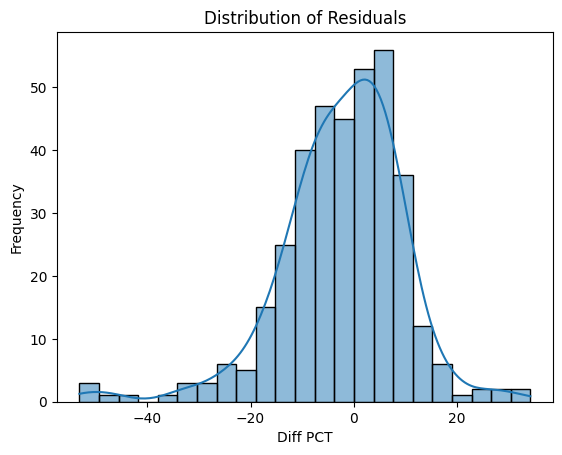

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(results_df['diff_pct'], kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Diff PCT')
plt.ylabel('Frequency')
plt.show()

In [73]:
extreme_error_threshold = 10  # You can adjust this threshold based on your domain knowledge or requirements
extreme_results_df = results_df[np.abs(results_df['diff_pct']) > extreme_error_threshold]
extreme_results_df.head()

,actual,predicted,diff,diff_pct,diff_pct_abs,diff_naive,diff_naive_pct,diff_naive_pct_abs
2161,139.0,120.498052,18.501948,13.310754,13.310754,17.333333,12.470024,12.470024
2162,121.0,133.101227,-12.101227,-10.001014,10.001014,-18.000000,-14.876033,14.876033
2166,143.0,117.379470,25.620530,17.916455,17.916455,22.000000,15.384615,15.384615
2167,118.0,131.442632,-13.442632,-11.392061,11.392061,-25.000000,-21.186441,21.186441
2168,80.0,119.478933,-39.478933,-49.348666,49.348666,-38.000000,-47.500000,47.500000


In [74]:
extreme_errors_pct = extreme_results_df.shape[0]*100/X_test.shape[0]
extreme_errors_pct

31.506849315068493

In [75]:
extreme_errors_df = X_test.loc[extreme_results_df.index]
extreme_errors_df.head(2)

,month,dayofyear,weekofyear,is_weekend,month_sin,month_cos,doy_sin,doy_cos,aqi_lag_1,aqi_lag_2,aqi_lag_3,aqi_lag_5,aqi_lag_7,aqi_lag_14,aqi_lag_21,aqi_lag_30,aqi_roll_mean_3,aqi_roll_std_3,aqi_roll_mean_7,aqi_roll_std_7,aqi_roll_mean_14,aqi_roll_std_14,aqi_roll_mean_30,aqi_roll_std_30,aqi_roll_min_7,aqi_roll_max_7,temp_lag_1,temp_lag_3,temp_lag_7,humidity_lag_1,humidity_lag_3,humidity_lag_7,dew_lag_1,dew_lag_3,dew_lag_7,windspeed_lag_1,windspeed_lag_3,windspeed_lag_7,winddir_lag_1,winddir_lag_3,winddir_lag_7,windgust_lag_1,windgust_lag_3,windgust_lag_7,precip_lag_1,precip_lag_3,precip_lag_7,precipcover_lag_1,precipcover_lag_3,precipcover_lag_7,cloudcover_lag_1,cloudcover_lag_3,cloudcover_lag_7,visibility_lag_1,visibility_lag_3,visibility_lag_7,sealevelpressure_lag_1,sealevelpressure_lag_3,sealevelpressure_lag_7,solarradiation_lag_1,solarradiation_lag_3,solarradiation_lag_7,solarenergy_lag_1,solarenergy_lag_3,solarenergy_lag_7,uvindex_lag_1,uvindex_lag_3,uvindex_lag_7,daylight_minutes_lag_1,daylight_minutes_lag_3,daylight_minutes_lag_7,preciptype_lag_1,preciptype_lag_3,preciptype_lag_7,icon_clear-day_lag_1,icon_clear-day_lag_3,icon_clear-day_lag_7,icon_partly-cloudy-day_lag_1,icon_partly-cloudy-day_lag_3,icon_partly-cloudy-day_lag_7,icon_rain_lag_1,icon_rain_lag_3,icon_rain_lag_7,tempmax_lag_1,tempmax_lag_3,tempmax_lag_7,tempmin_lag_1,tempmin_lag_3,tempmin_lag_7,moonphase_lag_1,moonphase_lag_3,moonphase_lag_7,temp_roll_mean_3,temp_roll_mean_7,temp_roll_mean_14,humidity_roll_mean_3,humidity_roll_mean_7,humidity_roll_mean_14,dew_roll_mean_3,dew_roll_mean_7,dew_roll_mean_14,windspeed_roll_mean_3,windspeed_roll_mean_7,windspeed_roll_mean_14,winddir_roll_mean_3,winddir_roll_mean_7,winddir_roll_mean_14,windgust_roll_mean_3,windgust_roll_mean_7,windgust_roll_mean_14,precip_roll_mean_3,precip_roll_mean_7,precip_roll_mean_14,precipcover_roll_mean_3,precipcover_roll_mean_7,precipcover_roll_mean_14,cloudcover_roll_mean_3,cloudcover_roll_mean_7,cloudcover_roll_mean_14,visibility_roll_mean_3,visibility_roll_mean_7,visibility_roll_mean_14,sealevelpressure_roll_mean_3,sealevelpressure_roll_mean_7,sealevelpressure_roll_mean_14,solarradiation_roll_mean_3,solarradiation_roll_mean_7,solarradiation_roll_mean_14,solarenergy_roll_mean_3,solarenergy_roll_mean_7,solarenergy_roll_mean_14,uvindex_roll_mean_3,uvindex_roll_mean_7,uvindex_roll_mean_14,daylight_minutes_roll_mean_3,daylight_minutes_roll_mean_7,daylight_minutes_roll_mean_14,preciptype_roll_mean_3,preciptype_roll_mean_7,preciptype_roll_mean_14,icon_clear-day_roll_mean_3,icon_clear-day_roll_mean_7,icon_clear-day_roll_mean_14,icon_partly-cloudy-day_roll_mean_3,icon_partly-cloudy-day_roll_mean_7,icon_partly-cloudy-day_roll_mean_14,icon_rain_roll_mean_3,icon_rain_roll_mean_7,icon_rain_roll_mean_14,tempmax_roll_mean_3,tempmax_roll_mean_7,tempmax_roll_mean_14,tempmin_roll_mean_3,tempmin_roll_mean_7,tempmin_roll_mean_14,moonphase_roll_mean_3,moonphase_roll_mean_7,moonphase_roll_mean_14,rain_days_last_3,rain_days_last_7,temp_humidity_interaction,wind_dispersion_index,stagnation_index,aqi_hist_prev_day_avg,aqi_hist_same_day_avg,aqi_hist_next_day_avg,aqi_hist_3day_window_avg,is_holiday,is_pre_holiday,is_post_holiday
2161,1,1,1,0,0.5,0.866025,0.017213,0.999852,121.666667,104.333333,87.000000,75.0,94.0,85.0,92.0,60.0,104.333333,17.333333,91.000000,17.436658,94.642857,13.804783,88.566667,16.864152,72.0,121.666667,22.8,22.9,22.8,70.4,75.0,80.9,16.6,17.7,19.2,20.7,22.0,14.6,78.6,67.9,22.5,38.5,26.3,23.0,0.0,0.0,0.3,0.0,0.00,12.50,34.2,41.7,56.3,5.9,5.0,4.8,1019.4,1019.3,1016.6,240.4,240.3,136.8,20.7,20.6,11.7,9.0,9.0,6.0,682.650000,682.366667,681.966667,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,28.2,28.9,26.9,17.7,17.5,18.0,0.00,0.95,0.82,22.733333,22.485714,23.035714,75.733333,81.042857,80.221429,17.800000,18.800000,19.178571,20.400000,18.757143,15.207143,71.966667,65.171429,54.014286,34.333333,32.914286,28.800000,0.033333,0.100000,0.214286,1.39,3.572857,4.762143,43.600000,54.257143,52.628571,5.466667

In [76]:
extreme_errors_df['month'].value_counts().sort_index()

month
1     13
2     12
3     10
4      9
5      5
6      5
7      7
8     13
9      5
10    18
11    10
12     8
Name: count, dtype: int64

# save models


In [77]:
import joblib

In [78]:
joblib.dump(best_cb, "artifacts/all_features_catboost.joblib")

['artifacts/all_features_catboost.joblib']

In [81]:
joblib.dump(best_gb, "artifacts/all_features_gradboost.joblib")

['artifacts/all_features_gradboost.joblib']

In [80]:
feature_columns = X_test.columns.tolist()
joblib.dump(feature_columns, "artifacts/all_features.joblib")

['artifacts/all_features.joblib']